In [1]:
import pandas as pd
import numpy as np

In [2]:
train_path = "../data/train/Train.csv"
test_path = "../data/test/TestSet.csv"

In [3]:
train_df = pd.read_csv(train_path)
train_df.head()

,ID,Longitude,Latitude,start_date,end_date,horizon_lower,horizon_upper,Depth_cm,Al,B,...,Fe,Mg,Mn,N,ph,P,K,Na,S,Zn
0,O2TONM,35.18756,-8.62390,01/01/2008,31/12/2018,50,20,20-50,1109.856,NaN,...,92.366,200.601,107.257,2.24,5.942,NaN,283.103,NaN,NaN,NaN
1,BQLUK6,35.18558,-8.62300,01/01/2008,31/12/2018,50,20,20-50,1168.364,NaN,...,115.923,197.771,90.005,1.57,5.722,NaN,215.459,NaN,NaN,NaN
2,LSET8M,35.18579,-8.62221,01/01/2008,31/12/2018,50,20,20-50,1137.113,NaN,...,78.709,188.114,120.433,1.02,5.510,NaN,398.656,NaN,NaN,NaN
3,LEEL7I,35.18266,-8.62177,01/01/2008,31/12/2018,50,20,20-50,1117.349,NaN,...,127.527,156.417,112.036,1.12,5.817,NaN,267.354,NaN,NaN,NaN
4,LDNGO2,35.12984,-8.62005,01/01/2008,31/12/2018,50,20,20-50,1219.203,NaN,...,77.542,114.809,57.906,1.19,4.980,NaN,229.682,NaN,NaN,NaN


In [4]:
test_df = pd.read_csv(test_path)
test_df.head()

,ID,Latitude,Longitude,Depth_cm,Target_Al,Target_B,Target_Ca,Target_Cu,Target_Fe,Target_K,Target_Mg,Target_Mn,Target_N,Target_Na,Target_P,Target_S,Target_Zn
0,8ZMJRO,-0.746,37.094,0-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DCC6DM,-0.785,37.178,0-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,T50LK1,-0.629,37.126,0-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,FNLYT0,-0.351,35.308,0-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FP5E12,-1.894,36.987,0-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Data Shape
train_df.shape, test_df.shape

((44298, 25), (6070, 17))

In [6]:
train_df.head().T

,0,1,2,3,4
ID,O2TONM,BQLUK6,LSET8M,LEEL7I,LDNGO2
Longitude,35.18756,35.18558,35.18579,35.18266,35.12984
Latitude,-8.6239,-8.623,-8.62221,-8.62177,-8.62005
start_date,01/01/2008,01/01/2008,01/01/2008,01/01/2008,01/01/2008
end_date,31/12/2018,31/12/2018,31/12/2018,31/12/2018,31/12/2018
horizon_lower,50,50,50,50,50
horizon_upper,20,20,20,20,20
Depth_cm,20-50,20-50,20-50,20-50,20-50
Al,1109.856,1168.364,1137.113,1117.349,1219.203
B,NaN,NaN,NaN,NaN,NaN


In [7]:
test_df.head().T

,0,1,2,3,4
ID,8ZMJRO,DCC6DM,T50LK1,FNLYT0,FP5E12
Latitude,-0.746,-0.785,-0.629,-0.351,-1.894
Longitude,37.094,37.178,37.126,35.308,36.987
Depth_cm,0-20,0-20,0-20,0-20,0-20
Target_Al,0.0,0.0,0.0,0.0,0.0
Target_B,0.0,0.0,0.0,0.0,0.0
Target_Ca,0.0,0.0,0.0,0.0,0.0
Target_Cu,0.0,0.0,0.0,0.0,0.0
Target_Fe,0.0,0.0,0.0,0.0,0.0
Target_K,0.0,0.0,0.0,0.0,0.0


In [8]:
# Count missing values per column
missing_counts = train_df.isna().sum()
missing_counts

ID                             0
Longitude                      0
Latitude                       0
start_date                     0
end_date                       0
horizon_lower                  0
horizon_upper                  0
Depth_cm                       0
Al                             2
B                          42389
Ca                             0
C_organic                      0
C_total                     1950
Cu                            41
electrical_conductivity    42391
Fe                            41
Mg                             0
Mn                            43
N                             41
ph                             3
P                          42389
K                              0
Na                         42350
S                          42389
Zn                         42389
dtype: int64

In [9]:
# Compute percentage of missing values
missing_percent = train_df.isna().mean() * 100
missing_percent.sort_values(ascending=False)

electrical_conductivity    95.695065
Zn                         95.690550
B                          95.690550
S                          95.690550
P                          95.690550
Na                         95.602510
C_total                     4.402005
Mn                          0.097070
N                           0.092555
Cu                          0.092555
Fe                          0.092555
ph                          0.006772
Al                          0.004515
Depth_cm                    0.000000
Latitude                    0.000000
start_date                  0.000000
K                           0.000000
end_date                    0.000000
Mg                          0.000000
horizon_lower               0.000000
Longitude                   0.000000
C_organic                   0.000000
Ca                          0.000000
horizon_upper               0.000000
ID                          0.000000
dtype: float64

In [10]:
# Missing Summary Table
missing_summary = pd.DataFrame({
    'missing_count': train_df.isna().sum(),
    'missing_percent': train_df.isna().mean() * 100
}).sort_values('missing_percent', ascending=False)

In [11]:
missing_summary

,missing_count,missing_percent
electrical_conductivity,42391,95.695065
Zn,42389,95.690550
B,42389,95.690550
S,42389,95.690550
P,42389,95.690550
Na,42350,95.602510
C_total,1950,4.402005
Mn,43,0.097070
N,41,0.092555
Cu,41,0.092555


Based on the missing summary table the train dataset has two categories of soil nutrients. That is Soil Macronutrients/major and Soil Micronutrient/minor. Soil Nutrients such as `Zinc/Zn`, `Boron/B`, `Sulphur/S`, `Sodium/Na`, and `Phosphorus/P` are micronutrients because based on previous work, most micronutrients panel are measured only on subset due to accessibility, and budget limitation in lab analysis.

In [12]:
train_df['Depth_cm'].unique()[:20]

<ArrowStringArray>
['20-50', '0-20']
Length: 2, dtype: str

In [13]:
train_df['Depth_cm'] = (
    train_df['Depth_cm']
    .str.split('-')
    .apply(lambda x: (float(x[0]) + float(x[1])) / 2)
)

In [14]:
train_df['Depth_log'] = np.log1p(train_df['Depth_cm'])

In [15]:
train_df['horizon_thickness'] = (
    train_df['horizon_lower'] - train_df['horizon_upper']
)

In [16]:
train_df[['Zn','B','S','P','Na']].dropna().shape

(1907, 5)

<Axes: xlabel='Longitude', ylabel='Latitude'>

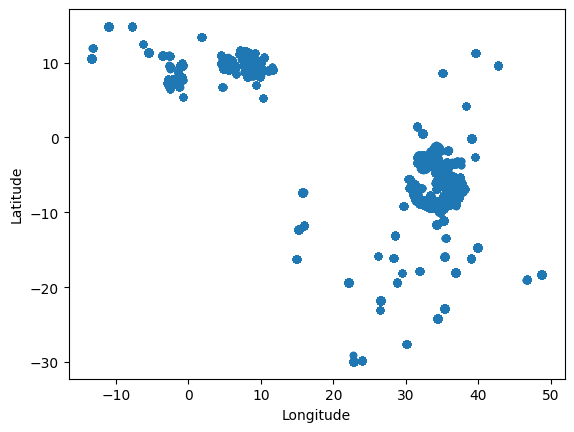

In [17]:
train_df.plot.scatter(x='Longitude', y='Latitude')

Display the data Location

In [18]:
import folium
from folium.plugins import FastMarkerCluster

In [19]:
# Center map at mean location
center = [train_df['Latitude'].mean(), train_df['Longitude'].mean()]
coords = train_df[['Latitude','Longitude']].dropna().values.tolist()

m = folium.Map(location=center, zoom_start=5)

FastMarkerCluster(coords).add_to(m)

m

In [20]:
train_df.tail()

,ID,Longitude,Latitude,start_date,end_date,horizon_lower,horizon_upper,Depth_cm,Al,B,...,Mn,N,ph,P,K,Na,S,Zn,Depth_log,horizon_thickness
44293,QFFYQA,8.65110,8.36451,01/01/2008,31/12/2018,20,0,10.0,1056.900,0.009823,...,57.8749,0.624507,5.86257,2.53468,91.2150,35.2692,8.79315,1.039760,2.397895,20
44294,FQ4TW6,11.39654,9.14604,01/01/2008,31/12/2018,20,0,10.0,320.713,0.009902,...,22.9532,0.337149,5.97490,9.60043,48.5838,37.9947,5.34999,0.858591,2.397895,20
44295,DVLY33,8.63908,8.38572,01/01/2008,31/12/2018,20,0,10.0,452.637,0.009937,...,41.2877,0.213871,6.22346,4.22926,42.6810,23.1472,4.92892,0.847897,2.397895,20
44296,V4GF3F,22.73692,-29.00123,01/01/2008,31/12/2018,20,0,10.0,NaN,0.360000,...,153.0000,0.346000,NaN,83.70000,417.0000,NaN,5.70000,1.950000,2.397895,20
44297,PD7CA4,22.73692,-29.00123,01/01/2008,31/12/2018,50,20,35.0,NaN,0.380000,...,151.0000,0.246000,NaN,30.90000,338.0000,NaN,4.80000,1.640000,3.583519,30


In [21]:
train_df['start_date'].unique()[:20]

<ArrowStringArray>
['01/01/2008']
Length: 1, dtype: str

In [22]:
train_df['end_date'].unique()[:20]

<ArrowStringArray>
['31/12/2018']
Length: 1, dtype: str

Extract Geospatial Covariates

In [23]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.warp import transform

In [24]:
raster_path = "../data/raw/Africa_Geospatial_Covariates_2008_2018_5km.tif"
band_names = [
    "elev_m", "slope_deg", "ndvi", "evi", "lst_day_c",
    "aridity_index", "rain_mm", "flowacc_cells", "twi"
]

In [25]:
def sample_multiband_raster_to_df(
    df: pd.DataFrame,
    raster_path: str,
    lon_col: str = "Longitude",
    lat_col: str = "Latitude",
    band_names: list[str] | None = None
) -> pd.DataFrame:
    if lon_col not in df.columns or lat_col not in df.columns:
        raise ValueError(f"DataFrame must contain '{lon_col}' and '{lat_col}' columns.")
    df_in = df.copy()
    pts = df_in[[lon_col, lat_col]].astype(float)
    # Drop rows with missing coords (keep index for merging)
    valid_mask = pts[lon_col].notna() & pts[lat_col].notna()
    pts_valid = pts.loc[valid_mask]
    with rasterio.open(raster_path) as src:
        raster_crs = src.crs
        if raster_crs is None:
            raise ValueError("Raster has no CRS. Fix/assign CRS before sampling.")
        # Prepare band names
        nbands = src.count
        if band_names is None:
            band_names_use = [f"band_{i}" for i in range(1, nbands + 1)]
        else:
            if len(band_names) != nbands:
                raise ValueError(f"band_names length ({len(band_names)}) != raster band count ({nbands}).")
            band_names_use = band_names
        # Transform points to raster CRS if needed
        xs = pts_valid[lon_col].to_numpy()
        ys = pts_valid[lat_col].to_numpy()
        if str(raster_crs).upper() not in ["EPSG:4326", "WGS84", "CRS:84"]:
            xs_t, ys_t = transform("EPSG:4326", raster_crs, xs.tolist(), ys.tolist())
            coords = list(zip(xs_t, ys_t))
        else:
            coords = list(zip(xs, ys))
        samples = np.array([val for val in src.sample(coords)], dtype="float64")
        nodata = src.nodata
        if nodata is not None:
            samples[samples == nodata] = np.nan
        cov_df = pd.DataFrame(samples, columns=band_names_use, index=pts_valid.index)
    out = df_in.join(cov_df)
    return out

In [26]:
train_df_with_covars = sample_multiband_raster_to_df(
    df=train_df,
    raster_path=raster_path,
    lon_col="Longitude",
    lat_col="Latitude",
    band_names=band_names
)
train_df_with_covars.head().T

,0,1,2,3,4
ID,O2TONM,BQLUK6,LSET8M,LEEL7I,LDNGO2
Longitude,35.18756,35.18558,35.18579,35.18266,35.12984
Latitude,-8.6239,-8.623,-8.62221,-8.62177,-8.62005
start_date,01/01/2008,01/01/2008,01/01/2008,01/01/2008,01/01/2008
end_date,31/12/2018,31/12/2018,31/12/2018,31/12/2018,31/12/2018
horizon_lower,50,50,50,50,50
horizon_upper,20,20,20,20,20
Depth_cm,35.0,35.0,35.0,35.0,35.0
Al,1109.856,1168.364,1137.113,1117.349,1219.203
B,NaN,NaN,NaN,NaN,NaN


Prepare feature Dataframe

In [27]:
base_features = [
    'Latitude',
    'Longitude',
    'Depth_cm',
    'Depth_log',
    'horizon_upper',
    'horizon_lower',
    'horizon_thickness',
    'ph',
    'C_organic',
    'C_total',
    'elev_m',
    'slope_deg',
    'ndvi',
    'evi',
    'lst_day_c',
    'aridity_index',
    'rain_mm',
    'flowacc_cells',
    'twi'
]

In [28]:
feature_map = {
    # Exchangeable bases / salinity–sodicity / leaching
    'Ca': base_features + ['ph', 'rain_mm', 'aridity_index', 'twi', 'flowacc_cells', 'slope_deg', 'C_organic', 'C_total'],
    'Mg': base_features + ['ph', 'rain_mm', 'aridity_index', 'twi', 'flowacc_cells', 'slope_deg', 'C_organic', 'C_total'],
    'K' : base_features + ['ph', 'C_organic', 'C_total', 'ndvi', 'evi', 'rain_mm', 'aridity_index', 'twi', 'flowacc_cells'],
    'Na': base_features + ['ph', 'electrical_conductivity', 'aridity_index', 'rain_mm', 'twi', 'flowacc_cells', 'lst_day_c'],

    # Acidity / Al mobilization
    'Al': base_features + ['ph', 'rain_mm', 'aridity_index', 'twi', 'flowacc_cells', 'C_organic', 'Depth_log'],

    # OM-driven macronutrients
    'N' : base_features + ['C_organic', 'C_total', 'ndvi', 'evi', 'lst_day_c', 'rain_mm', 'aridity_index', 'twi', 'Depth_log'],
    'S' : base_features + ['C_organic', 'C_total', 'ndvi', 'evi', 'rain_mm', 'aridity_index', 'twi', 'flowacc_cells', 'Depth_log'],

    # Redox / drainage-sensitive
    'Fe': base_features + ['twi', 'flowacc_cells', 'slope_deg', 'rain_mm', 'aridity_index', 'lst_day_c', 'ph', 'Depth_log'],
    'Mn': base_features + ['twi', 'flowacc_cells', 'slope_deg', 'rain_mm', 'aridity_index', 'lst_day_c', 'ph', 'Depth_log'],

    # Micronutrients (availability depends strongly on pH + OM + redox/redistribution)
    'Zn': base_features + ['ph', 'C_organic', 'C_total', 'twi', 'flowacc_cells', 'rain_mm', 'aridity_index', 'ndvi', 'evi', 'lst_day_c', 'Depth_log'],
    'Cu': base_features + ['C_organic', 'C_total', 'ph', 'twi', 'flowacc_cells', 'rain_mm', 'aridity_index', 'ndvi', 'evi', 'Depth_log'],
    'B' : base_features + ['rain_mm', 'aridity_index', 'twi', 'flowacc_cells', 'ph', 'C_organic', 'lst_day_c', 'Depth_log'],

    # Phosphorus (strongly tied to pH + retention chemistry + landscape redistribution)
    'P' : base_features + ['ph', 'C_organic', 'C_total', 'twi', 'flowacc_cells', 'slope_deg', 'rain_mm', 'aridity_index', 'ndvi', 'evi', 'Depth_log']
}

feature_map['Zn'] += ['B', 'S', 'P', 'Na']
feature_map['B']  += ['Zn', 'S', 'P', 'Na']
feature_map['P']  += ['Zn', 'B', 'S'] 
feature_map['Na'] += ['electrical_conductivity']

In [29]:
dfs = {}

for target, features in feature_map.items():
    cols = list(set(features + [target]))
    df_target = train_df_with_covars.loc[train_df_with_covars[target].notna(), cols]
    dfs[target] = df_target

In [30]:
dfs['Zn'].isna().sum()

Latitude                0
Longitude               0
elev_m                  0
Depth_log               0
C_total              1909
horizon_upper           0
lst_day_c               0
slope_deg               0
Zn                      0
ph                      2
Na                      2
P                       0
C_organic               0
evi                     0
aridity_index           0
rain_mm                 0
twi                     0
Depth_cm                0
horizon_lower           0
B                       0
flowacc_cells           0
ndvi                    0
horizon_thickness       0
S                       0
dtype: int64

In [31]:
from sklearn.impute import SimpleImputer

dfs_clean = {}

for target, df_target in dfs.items():
    df_clean = df_target.copy()
    # drop high-missing feature
    if 'C_total' in df_clean.columns:
        df_clean = df_clean.drop(columns=['C_total'])
    # separate X and y
    y = df_clean[target]
    X = df_clean.drop(columns=[target])
    # median imputation
    imputer = SimpleImputer(strategy='median')
    X_imputed = imputer.fit_transform(X)
    X_imputed = pd.DataFrame(X_imputed, columns=X.columns)
    dfs_clean[target] = pd.concat([X_imputed, y.reset_index(drop=True)], axis=1)

In [32]:
dfs_clean['Na'].isna().sum()

Latitude                   0
Longitude                  0
elev_m                     0
Depth_log                  0
horizon_upper              0
lst_day_c                  0
slope_deg                  0
ph                         0
electrical_conductivity    0
C_organic                  0
evi                        0
aridity_index              0
rain_mm                    0
twi                        0
Depth_cm                   0
horizon_lower              0
flowacc_cells              0
ndvi                       0
horizon_thickness          0
Na                         0
dtype: int64